<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_transformer_encoder_daug_drop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip

In [ ]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [ ]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [ ]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [ ]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [ ]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [ ]:
!wget https://github.com/takayama-rado/trado_samples/archive/master.zip

--2024-06-25 05:15:10--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-06-25 05:15:10--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [                <=> ]  75.33M  16.2MB/s    in 4.6s    

2024-06-25 05:15:15 (16.2 MB/s) - ‘master.zip’ saved [78989967]



In [ ]:
!unzip -o master.zip -d master

Archive:  master.zip
cccc8a138762276b3ad2e586307fce5fe1d06a49
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [ ]:
!mv master/trado_samples-main/src/modules_gislr .

In [ ]:
!rm -rf master master.zip gislr_top10.zip

In [ ]:
!ls

dataset_top10  drive  modules_gislr  sample_data


# 2. Load library

In [ ]:
import copy
import json
import math
import os
import random
import sys
from functools import partial
from inspect import signature
from pathlib import Path
from typing import (
    Any,
    Dict,
    List
)

# Third party's modules
import cv2

import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    USE_FACE,
    USE_LHAND,
    USE_POSE,
    USE_RHAND,
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    Identity,
    GPoolRecognitionHead,
    TransformerEnISLR
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)

# 3. Implement feature drop classes.

In [ ]:
class RandomDropParts():
    def __init__(self,
                 apply_ratio,
                 face_head=0,
                 face_num=len(USE_FACE),
                 lhand_head=len(USE_FACE),
                 lhand_num=len(USE_LHAND),
                 pose_head=len(USE_FACE)+len(USE_LHAND),
                 pose_num=len(USE_POSE),
                 rhand_head=len(USE_FACE)+len(USE_LHAND)+len(USE_POSE),
                 rhand_num=len(USE_RHAND),
                 relative_drop_freq=None):
        targets = []
        if face_head is not None:
            targets.append("face")
        if lhand_head is not None:
            targets.append("lhand")
        if pose_head is not None:
            targets.append("pose")
        if rhand_head is not None:
            targets.append("rhand")

        if relative_drop_freq is not None:
            message = f"relative_drop_freq:{relative_drop_freq}, targets:{targets}"
            assert len(relative_drop_freq) == len(targets), message
            temp = np.array(relative_drop_freq)
            temp = np.cumsum(temp / temp.sum())
            self.relative_drop_ratio = temp * apply_ratio
        else:
            self.relative_drop_ratio = np.array([0.25]*len(targets))

        self.apply_ratio = apply_ratio
        self.face_joints = np.arange(face_head, face_head + face_num) if "face" in targets \
            else None
        self.lhand_joints = np.arange(lhand_head, lhand_head + lhand_num) if "lhand" in targets \
            else None
        self.pose_joints = np.arange(pose_head, pose_head + pose_num) if "pose" in targets \
            else None
        self.rhand_joints = np.arange(rhand_head, rhand_head + rhand_num) if "rhand" in targets \
            else None
        self.targets = targets

    def __call__(self,
                 data: Dict[str, Any]) -> Dict[str, Any]:
        rval = random.random()
        if rval > self.apply_ratio:
            return data

        lower_bound = 0
        feature = data["feature"]
        mask = (feature == 0).all(axis=0)
        mask = np.bitwise_not(mask)
        mask = np.expand_dims(mask, 0)
        for target, ratio in zip(self.targets, self.relative_drop_ratio):
            if target == "face":
                target_joints = self.face_joints
            elif target == "lhand":
                target_joints = self.lhand_joints
            elif target == "pose":
                target_joints = self.pose_joints
            elif target == "rhand":
                target_joints = self.rhand_joints
            if rval >= lower_bound and rval < ratio:
                mask[:, :, target_joints] = 0.0
                break
            else:
                lower_bound = ratio
        if not (mask == 0.0).all():
            feature *= mask

        data["feature"] = feature
        return data

In [ ]:
class RandomDropJoints():
    def __init__(self,
                 apply_ratio,
                 drop_ratio,
                 undrop_joints=None,
                 drop_tsize=1):
        self.apply_ratio = apply_ratio
        self.drop_ratio = drop_ratio
        self.undrop_joints = undrop_joints
        assert drop_tsize % 2 == 1
        self.kernel = np.array([[1] * drop_tsize], dtype=np.uint8).T

    def __call__(self,
                 data: Dict[str, Any]) -> Dict[str, Any]:

        if random.random() > self.apply_ratio:
            return data

        feature = data["feature"]
        mask = (feature == 0).all(axis=0)
        mask = np.bitwise_not(mask)
        undrop = np.random.random(mask.shape)
        undrop[undrop >= self.drop_ratio] = 1.0
        undrop[undrop < self.drop_ratio] = 0.0
        temp = undrop.astype(np.uint8)

        temp = cv2.erode(temp, self.kernel)
        undrop = np.expand_dims(temp, axis=0)

        if self.undrop_joints is not None:
            undrop[:, :, self.undrop_joints] = 1.0
        mask = np.bitwise_and(mask, undrop)
        if not (mask == 0.0).all():
            feature *= mask

        data["feature"] = feature
        return data

In [ ]:
class RandomDropTemporal():
    def __init__(self,
                 apply_ratio=1.0,
                 size=(0.1, 0.5)):
        self.apply_ratio = apply_ratio
        self.size = size

    def __call__(self,
                 data: Dict[str, Any]) -> Dict[str, Any]:
        if random.random() > self.apply_ratio:
            return data

        feature = data["feature"]
        mask = (feature == 0).all(axis=0)
        mask = np.bitwise_not(mask)

        # Calculate drop range.
        tlength = feature.shape[1]
        size = np.random.random() * (self.size[1] - self.size[0]) + self.size[0]
        start = np.random.random()
        end = start + size
        start = int(tlength * start)
        end = min(int(tlength * end), tlength)

        # Masking.
        mask[None, start: end, :] = 0.0

        # Avoid to drop all signals.
        if not (mask == 0.0).all():
            feature *= mask

        data["feature"] = feature
        return data

In [ ]:
class RandomDropSpatial():
    def __init__(self,
                 apply_ratio=1.0,
                 size=(0.2, 0.4),
                 offsets=None,
                 smask_as="obstacle"):
        self.apply_ratio = apply_ratio
        self.size = size
        self.offsets = offsets
        assert smask_as in ["obstacle", "window"]
        self.smask_as = smask_as

    def __call__(self,
                 data: Dict[str, Any]) -> Dict[str, Any]:
        if random.random() > self.apply_ratio:
            return data

        feature = copy.deepcopy(data["feature"])
        mask = (feature == 0).all(axis=0)
        mask = np.bitwise_not(mask)

        # Maximum spatial range.
        minimums = np.min(feature, axis=(1, 2))
        maximums = np.max(feature, axis=(1, 2))

        min_x = minimums[0]
        min_y = minimums[1]
        max_x = maximums[0]
        max_y = maximums[1]

        # Calculate drop rectangle.
        if self.offsets is None:
            dr_offset_x = np.random.random() * (max_x - min_x) + min_x
            dr_offset_y = np.random.random() * (max_y - min_y) + min_y
        else:
            dr_offset_x = self.offsets[0] * (max_x - min_x) + min_x
            dr_offset_y = self.offsets[1] * (max_y - min_y) + min_y

        dr_size = np.random.random() * (self.size[1] - self.size[0]) + self.size[0]
        dr_size_x = (max_x - min_x) * dr_size
        dr_size_y = (max_y - min_y) * dr_size

        # Undrop in the window.
        udr_x = (dr_offset_x <= feature[0, :, :])
        udr_x = np.bitwise_and(udr_x, (feature[0, :, :] <= (dr_offset_x + dr_size_x)))
        udr_y = (dr_offset_y <= feature[1, :, :])
        udr_y = np.bitwise_and(udr_y, (feature[1, :, :] <= (dr_offset_y + dr_size_y)))
        undrop = np.bitwise_and(udr_x, udr_y)

        if minimums.shape[0] == 3:
            min_z = minimums[2]
            max_z = minimums[2]
            if self.offsets is None:
                dr_offset_z = np.random.random() * (max_z - min_z) + min_z
            else:
                dr_offset_z = self.offsets[2] * (max_z - min_z) + min_z
            dr_size_z = (max_z - min_z) * dr_size
            # Drop in the window.
            udr_z = (dr_offset_z <= feature[2, :, :])
            udr_z = np.bitwise_and(udr_z, (feature[2, :, :] <= (dr_offset_z + dr_size_z)))
            undrop = np.bitwise_and(undrop, udr_z)

        # Inverse undrop mask to interpret spatial mask as window.
        if self.smask_as == "window":
            undrop = np.bitwise_not(undrop)

        mask = np.bitwise_and(mask, undrop)
        if not (mask == 0.0).all():
            feature *= mask

        # Avoid to drop all signals.
        if not (feature == 0.0).all():
            data["feature"] = feature
        return data

# 4. Sanity check

In [ ]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/29302.hdf5')]


In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [ ]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

apply_ratio = 0.5
drop_ratio = 0.5
drop_tsize = 3
drop_srange_o = (0.1, 0.3)
drop_srange_w = (0.7, 0.9)
drop_trange = (0.1, 0.5)

pre_transforms = Compose([trans_select_feature,
                          trans_repnan,
                          trans_norm])

transforms_default = Compose([ToTensor()])

transforms_drop_parts = Compose([
    RandomDropParts(
        apply_ratio=apply_ratio),
    ToTensor()])

transforms_drop_joints = Compose([
    RandomDropJoints(
        apply_ratio=apply_ratio,
        drop_ratio=drop_ratio,
        drop_tsize=drop_tsize),
    ToTensor()])

transforms_drop_temporal = Compose([
    RandomDropTemporal(
        apply_ratio=apply_ratio,
        size=drop_trange),
    ToTensor()])

transforms_drop_spatial_o = Compose([
    RandomDropSpatial(
        apply_ratio=apply_ratio,
        size=drop_srange_o,
        offsets=None,
        smask_as="obstacle"),
    ToTensor()])

transforms_drop_spatial_w = Compose([
    RandomDropSpatial(
        apply_ratio=apply_ratio,
        size=drop_srange_w,
        offsets=None,
        smask_as="window"),
    ToTensor()])

In [ ]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

for trans in [transforms_default, transforms_drop_parts, transforms_drop_joints, transforms_drop_temporal, transforms_drop_spatial_o, transforms_drop_spatial_w]:
    dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=trans)
    dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
    try:
        data = next(iter(dataloader))
        feature_origin = data["feature"]

        print(feature_origin.shape)
    except Exception as inst:
        print(inst)

torch.Size([2, 2, 28, 130])
torch.Size([2, 2, 28, 130])
torch.Size([2, 2, 28, 130])
torch.Size([2, 2, 28, 130])
torch.Size([2, 2, 28, 130])
torch.Size([2, 2, 28, 130])


In [ ]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
inter_channels = 64
out_channels = VOCAB
activation = "relu"
tren_num_layers = 2
tren_num_heads = 2
tren_dim_ffw = 256
tren_dropout_pe = 0.1
tren_dropout = 0.1
tren_layer_norm_eps = 1e-5
tren_norm_first = True
tren_add_bias = True
tren_add_tailnorm = True

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)
attw0 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
attw1 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
print(attw0.shape, attw1.shape)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

# 5. Train and evaluation

## 5.1 Set common parameters.

In [ ]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


## 5.2 Run training process

### Default settings

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_default = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_default)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_default.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_default.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_default, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_default, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_default, device)
        test_accs.append(acc)
train_losses_default = np.array(train_losses)
val_losses_default = np.array(val_losses)
test_accs_default = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_default.min()} at {np.argmin(val_losses_default)+1} epoch.")
print(f"Maximum accuracy:{test_accs_default.max()} at {np.argmax(test_accs_default)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.446782 [    0/ 3881]
loss:2.071606 [ 3200/ 3881]
Done. Time:4.922797406000001
Training performance: 
 Avg loss:2.194979

Start validation.
Done. Time:0.4103152080000143
Validation performance: 
 Avg loss:1.961810

Start evaluation.
Done. Time:1.802768350000008
Test performance: 
 Accuracy:28.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.849909 [    0/ 3881]
loss:1.331969 [ 3200/ 3881]
Done. Time:3.1558078449999982
Training performance: 
 Avg loss:1.592416

Start validation.
Done. Time:0.2590590979999945
Validation performance: 
 Avg loss:1.795263

Start evaluation.
Done. Time:1.2883900770000025
Test performance: 
 Accuracy:39.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.700335 [    0/ 3881]
loss:1.210413 [ 3200/ 3881]
Done.

### Apply drop parts.

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_drop_parts,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_drop_parts = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_drop_parts)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_drop_parts.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_drop_parts.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_drop_parts, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_drop_parts, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_drop_parts, device)
        test_accs.append(acc)
train_losses_drop_parts = np.array(train_losses)
val_losses_drop_parts = np.array(val_losses)
test_accs_drop_parts = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_drop_parts.min()} at {np.argmin(val_losses_drop_parts)+1} epoch.")
print(f"Maximum accuracy:{test_accs_drop_parts.max()} at {np.argmax(test_accs_drop_parts)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.509064 [    0/ 3881]
loss:1.737818 [ 3200/ 3881]
Done. Time:3.343957509000006
Training performance: 
 Avg loss:2.149402

Start validation.
Done. Time:0.28086424299999635
Validation performance: 
 Avg loss:2.020399

Start evaluation.
Done. Time:1.2299449239999944
Test performance: 
 Accuracy:32.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.666895 [    0/ 3881]
loss:1.607210 [ 3200/ 3881]
Done. Time:5.042939809000018
Training performance: 
 Avg loss:1.487222

Start validation.
Done. Time:0.443012901999964
Validation performance: 
 Avg loss:2.064891

Start evaluation.
Done. Time:1.3333736849999696
Test performance: 
 Accuracy:31.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.046700 [    0/ 3881]
loss:1.164880 [ 3200/ 3881]
Done.

### Apply drop joints.

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_drop_joints,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_drop_joints = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_drop_joints)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_drop_joints.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_drop_joints.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_drop_joints, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_drop_joints, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_drop_joints, device)
        test_accs.append(acc)
train_losses_drop_joints = np.array(train_losses)
val_losses_drop_joints = np.array(val_losses)
test_accs_drop_joints = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_drop_joints.min()} at {np.argmin(val_losses_drop_joints)+1} epoch.")
print(f"Maximum accuracy:{test_accs_drop_joints.max()} at {np.argmax(test_accs_drop_joints)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.774962 [    0/ 3881]
loss:2.188772 [ 3200/ 3881]
Done. Time:5.419561940999984
Training performance: 
 Avg loss:2.380561

Start validation.
Done. Time:0.29409764499996527
Validation performance: 
 Avg loss:2.104297

Start evaluation.
Done. Time:1.2767829260000099
Test performance: 
 Accuracy:13.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.113671 [    0/ 3881]
loss:2.010019 [ 3200/ 3881]
Done. Time:3.723353019000001
Training performance: 
 Avg loss:2.065985

Start validation.
Done. Time:0.2899211250000917
Validation performance: 
 Avg loss:1.983833

Start evaluation.
Done. Time:1.2038723960000652
Test performance: 
 Accuracy:28.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.847399 [    0/ 3881]
loss:1.616807 [ 3200/ 3881]
Done

### Apply temporal drop.

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_drop_temporal,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_drop_temporal = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_drop_temporal)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_drop_temporal.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_drop_temporal.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_drop_temporal, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_drop_temporal, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_drop_temporal, device)
        test_accs.append(acc)
train_losses_drop_temporal = np.array(train_losses)
val_losses_drop_temporal = np.array(val_losses)
test_accs_drop_temporal = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_drop_temporal.min()} at {np.argmin(val_losses_drop_temporal)+1} epoch.")
print(f"Maximum accuracy:{test_accs_drop_temporal.max()} at {np.argmax(test_accs_drop_temporal)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.349142 [    0/ 3881]
loss:2.101521 [ 3200/ 3881]
Done. Time:3.2991767180000124
Training performance: 
 Avg loss:2.246184

Start validation.
Done. Time:0.4164949500000148
Validation performance: 
 Avg loss:2.177349

Start evaluation.
Done. Time:1.7485595770000373
Test performance: 
 Accuracy:23.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.970110 [    0/ 3881]
loss:1.648394 [ 3200/ 3881]
Done. Time:4.696601779999924
Training performance: 
 Avg loss:1.580020

Start validation.
Done. Time:0.30510267700003624
Validation performance: 
 Avg loss:1.847902

Start evaluation.
Done. Time:1.3089657240000179
Test performance: 
 Accuracy:37.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.224199 [    0/ 3881]
loss:1.092417 [ 3200/ 3881]
Don

### Apply spatial drop using obstacle mask.

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_drop_spatial_o,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_drop_spatial_o = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_drop_spatial_o)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_drop_spatial_o.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_drop_spatial_o.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_drop_spatial_o, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_drop_spatial_o, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_drop_spatial_o, device)
        test_accs.append(acc)
train_losses_drop_spatial_o = np.array(train_losses)
val_losses_drop_spatial_o = np.array(val_losses)
test_accs_drop_spatial_o = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_drop_spatial_o.min()} at {np.argmin(val_losses_drop_spatial_o)+1} epoch.")
print(f"Maximum accuracy:{test_accs_drop_spatial_o.max()} at {np.argmax(test_accs_drop_spatial_o)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.567831 [    0/ 3881]
loss:2.147800 [ 3200/ 3881]
Done. Time:3.651366952999979
Training performance: 
 Avg loss:2.386739

Start validation.
Done. Time:0.32229267299999265
Validation performance: 
 Avg loss:2.099621

Start evaluation.
Done. Time:1.2576158140000189
Test performance: 
 Accuracy:25.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.060759 [    0/ 3881]
loss:1.896333 [ 3200/ 3881]
Done. Time:3.5448091060000024
Training performance: 
 Avg loss:2.021888

Start validation.
Done. Time:0.3173271709999881
Validation performance: 
 Avg loss:2.038805

Start evaluation.
Done. Time:1.5100024769999436
Test performance: 
 Accuracy:29.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.840236 [    0/ 3881]
loss:1.735341 [ 3200/ 3881]
Don

### Apply spatial drop using window mask.

In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_drop_spatial_w,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True

model_drop_spatial_w = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_drop_spatial_w)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_drop_spatial_w.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [ ]:
# Train, validation, and evaluation.
model_drop_spatial_w.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_drop_spatial_w, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_drop_spatial_w, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_drop_spatial_w, device)
        test_accs.append(acc)
train_losses_drop_spatial_w = np.array(train_losses)
val_losses_drop_spatial_w = np.array(val_losses)
test_accs_drop_spatial_w = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_drop_spatial_w.min()} at {np.argmin(val_losses_drop_spatial_w)+1} epoch.")
print(f"Maximum accuracy:{test_accs_drop_spatial_w.max()} at {np.argmax(test_accs_drop_spatial_w)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.762205 [    0/ 3881]
loss:1.942303 [ 3200/ 3881]
Done. Time:3.490843231000099
Training performance: 
 Avg loss:2.197201

Start validation.
Done. Time:0.32516690000011295
Validation performance: 
 Avg loss:1.934978

Start evaluation.
Done. Time:1.2699231670001154
Test performance: 
 Accuracy:33.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.729938 [    0/ 3881]
loss:1.372463 [ 3200/ 3881]
Done. Time:4.385153731999935
Training performance: 
 Avg loss:1.582265

Start validation.
Done. Time:0.532153438000023
Validation performance: 
 Avg loss:1.644094

Start evaluation.
Done. Time:1.945661593000068
Test performance: 
 Accuracy:46.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.091552 [    0/ 3881]
loss:1.131323 [ 3200/ 3881]
Done. 

### Plort result
#### Recognition performance

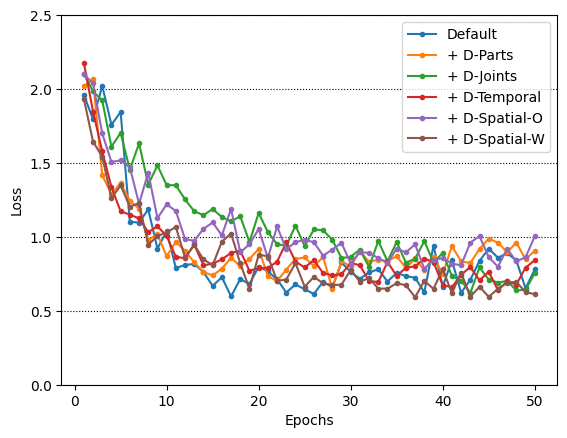

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_default)+1)
plt.plot(xs, val_losses_default, label="Default", marker=".")
plt.plot(xs, val_losses_drop_parts, label="+ D-Parts", marker=".")
plt.plot(xs, val_losses_drop_joints, label="+ D-Joints", marker=".")
plt.plot(xs, val_losses_drop_temporal, label="+ D-Temporal", marker=".")
plt.plot(xs, val_losses_drop_spatial_o, label="+ D-Spatial-O", marker=".")
plt.plot(xs, val_losses_drop_spatial_w, label="+ D-Spatial-W", marker=".")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

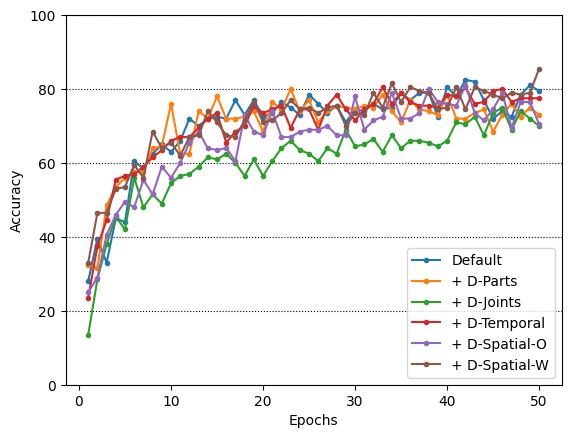

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_default)+1)
plt.plot(xs, test_accs_default, label="Default", marker=".")
plt.plot(xs, test_accs_drop_parts, label="+ D-Parts", marker=".")
plt.plot(xs, test_accs_drop_joints, label="+ D-Joints", marker=".")
plt.plot(xs, test_accs_drop_temporal, label="+ D-Temporal", marker=".")
plt.plot(xs, test_accs_drop_spatial_o, label="+ D-Spatial-O", marker=".")
plt.plot(xs, test_accs_drop_spatial_w, label="+ D-Spatial-W", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()